In [3]:
!pip install scikit-learn

In [2]:
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
data = pd.read_csv('sensor_log.csv')
data

,standard distance,real distance
0,0.0,44.0
1,0.0,46.0
2,0.0,46.0
3,0.0,47.0
4,0.0,44.0
...,...,...
4084,54.0,34.0
4085,54.0,30.0
4086,54.0,25.0
4087,54.0,18.0


In [62]:
data_optimize = data.copy()
data_optimize = data_optimize[data_optimize['standard distance'] > 0]
data_optimize.head()

,standard distance,real distance
22,44.0,44.0
23,44.0,44.0
24,44.0,46.0
25,44.0,47.0
26,44.0,48.0


In [63]:
data_diff = pd.DataFrame()
data_diff['diff'] = abs(data_optimize['real distance'] - data_optimize['standard distance'] )
# data_diff[data_diff['diff'] < 0]

In [66]:
data_optimize['diff'] = data_diff
data_optimize = data_optimize[data_optimize['diff'] < 100]

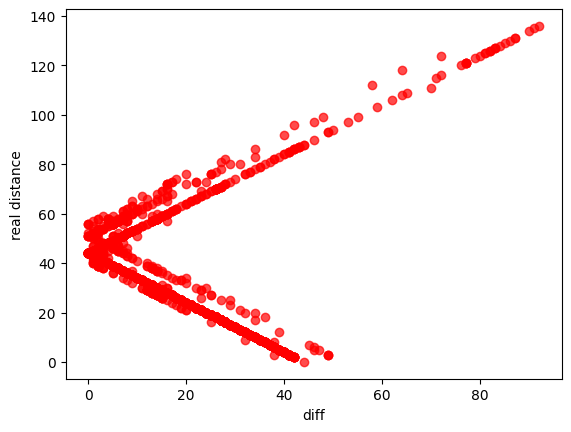

In [67]:
plt.scatter(x=data_optimize['diff'], y=data_optimize['real distance'],c='red', alpha=0.7)
plt.xlabel('diff')
plt.ylabel('real distance')
plt.show()

In [68]:
data_training = data_optimize[['diff']]
data_training.head()

,diff
22,0.0
23,0.0
24,2.0
25,3.0
26,4.0


In [69]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(data_training)

KMeans(n_clusters=2, random_state=0)

In [70]:
print(kmeans.labels_)

[1 1 1 ... 0 0 0]


In [71]:
data_cluster = data_optimize.copy()
data_cluster['diff'] = data_diff
data_cluster['cluster'] = kmeans.labels_
data_cluster.head()

,standard distance,real distance,diff,cluster
22,44.0,44.0,0.0,1
23,44.0,44.0,0.0,1
24,44.0,46.0,2.0,1
25,44.0,47.0,3.0,1
26,44.0,48.0,4.0,1


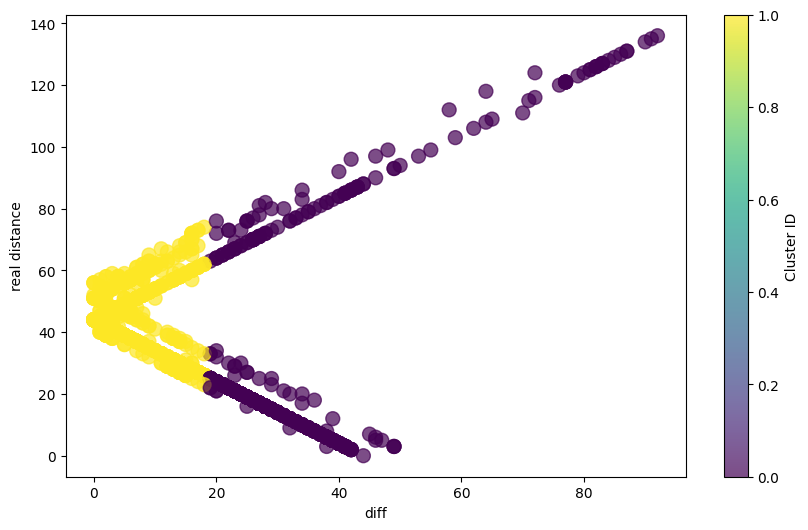

In [72]:
plt.figure(figsize=(10,6))
scatter = plt.scatter(x=data_cluster['diff'], y=data_cluster['real distance'], c=data_cluster['cluster'], cmap='viridis', s=100,alpha=0.7)
plt.xlabel('diff')
plt.ylabel('real distance')
plt.colorbar(scatter, label='Cluster ID')
plt.show()

Cluster 0 is the group where your back is not straight and you cannot concentrate, and cluster 1 is the group where your back is straight.